# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

Если вы читаете эти строки, значит вы успешно установили и запустили Jupyter Notebook.

##  Особенности работы в Jupyter Notebook

1. Код пишется в "клетках" ```In []:```, результат исполнения - под ними или в "клетках" ```Out []:```.
2. Stack Trace тоже отображается под клетками ```In []:```.
2. Цифра в квадрантных скобках - порядковый номер исполнения данного фрагмента кода.
2. Запуск кода: ```Shift - Enter``` - с переходом в следующую "клетку", ```Ctrl - Enter``` - без оного.
3. Все переменные, объявленные в "клетке" становятся видимыми внутри всей тетрадки.
4. Все переменные, объявленные в тетрадке, видимы только внутри нее и не влияют на другие открытые тетрадки.

### Если "Что-то пошло не так..."

1. Кнопка останова кода (меню Kernel / Interrupt) прервет выполнение кода исключением ```KeyboardInterrupt```
1. Если это не помогает - надо перезапустить ядро (меню Kernel / Restart), и потом последовательно выполнить все предыдущие "клетки".
2. Если и это не помогает - снимите процесс python.


### Синтаксис Python в Jupyter Notebook

1. Есть подсветка синтаксиса.
2. Отступы проставляются автоматически, можно использовать tab.
3. По нажатию tab - автозаполнение.
4. Символ "?", указанный до или после переменной, открывает окно с информацией о ней (будь это просто переменная или функция).
5. Закомментировать выделенные строки можно сочетанием клавиш ```Ctrl - /```.




In [ ]:
b = [1,2,3]

In [ ]:
b

In [ ]:
print(b)

In [ ]:
b?

In [ ]:
def mul_numbers(a, b):
    """
    Функция умножает два числа
    """
    return a * b

In [ ]:
mul_numbers?

In [ ]:
# два знака вопроса откроют окно с исходным кодом
mul_numbers??

### "Волшебные команды" (Jupyter Magic)

#### Профайлинг и отладка

- ```%time``` - показывает время выполнения строки кода
- ```%%time``` - показывает время выполнения ячейки кода

In [ ]:
def sum_exps( number ):
    return sum(x**x for x in range( number ))

def sum_exps_naive( number ):
    summ = 0
    for i in range(number):
        pw = i
        for _ in range(i-1):
            pw *= i
        summ += pw
    return summ


In [ ]:
%%time # для всей клетки
print("Hello World")
a = sum_exps_naive( 1000 )
b = sum_exps( 1000 )

In [ ]:
# для каждой строчки
%time a = sum_exps_naive( 1000 )
%time b = sum_exps( 1000 )

- ```%timeit``` - выполнить код несколько раз и показать среднее время выполнения кода. Запуск с ```%%``` приведет к "прокручиванию" кода всей клетки.

Можно задать количество итерациий, запустив эту команду с параметром -nN, где N - количество циклов.

In [ ]:
%timeit sum_exps( 1000 )

In [ ]:
%timeit -n200 -r2 sum_exps_naive( 1000 )

- ```%prun``` - построчный профайлер

In [ ]:
%%prun 
for i in range ( 10 ):
    sum_exps( 1000 )

### Встроенный debugger

- ```%pdb``` - запускает дебаггер сразу после того, как появилось исключение
- появляется приглашение ```ipdb>```, в котором можно вводить команды
- чтобы посмотреть значение той или иной переменной, надо просто набрать ее имя
- чтобы изменить значение - достаточно использовать операцию присваивания
- чтобы выйти - нужно набрать команду ```exit```
- чтобы посмотреть все команды дебаггера нужно набрать команду ```help```

In [ ]:
def a_divider(dividend, divisors):
    l = []
    for divisor in divisors:
        l.append(dividend // divisor)
    return l    

In [ ]:
print(a_divider(500, [1,2,3,4,5]))

In [ ]:
%pdb 
print(a_divider(500, [1,2,3, 0 ,4,5]))

### Другие полезные "волшебные" функции

Справка по всем "магическим" функциям - ```%magic```

In [ ]:
# список объявленных переменных
%who

In [ ]:
# показать историю команд
%hist

In [ ]:
# текущий каталог можно узнать через команду %pwd
x = %pwd
x

In [ ]:
# удалить переменную и попытаться очистить все ссылки на объект во внутреннем пространстве имен Jupyter Notebook
%xdel i

In [ ]:
# удалить все переменные
%reset 

### Командная строка/терминал

Для запуска команд терминала прямо в тетради начните клетку с восклицательного знака:

In [ ]:
!pip list 

### Подключение внешних модулей

1. Если ```import module``` не может найти нужный модуль, используйте команды ```!pip install ...``` или ```!conda install ...``` в любой клетке вашей тетради или то же самое, но без восклицательного знака, но в командной строке.
Посмотреть, в какой директории python ищет модули, можно выполнив команду ```import sys;print(sys.path)```

In [ ]:
import sys;print(sys.path)


2. Если вы разрабатываете свой модуль во внешнем редакторе, а отлаживаете его в Jupyter, включите автообновление модуля по мере его сохранения:
```python
%load_ext autoreload
%autoreload 2
```

__ВНИМАНИЕ__! Данную команду следует указывать после имеорта всех внешних модулей, но перед импортом вашего модуля:

In [ ]:
import numpy as np

%load_ext autoreload
%autoreload 2

import mymod

mymod.do()

## Jupyter Notebook как веб-сервер

Jupyter Notebook запускает на вашем компьютере веб-сервер. Собственно, он и выполняет код, сохраняет тетрадки, графику и т.д. По умолчанию, этим веб-сервером можете пользоваться только вы, и только с того компьютера, на котором вы запустили Jupyter Notebook.

Веб-сервер по умолчанию работает на 8888 порту, и чтобы открыть навигатор Jupyter Notebook, вам нужно ввести в адресную строку браузера следующий адрес:
``` http://localhost:8888/ ```

### Запуск Jupyter Notebook удаленно / в облаке

1. Можно использовать Google Colab
2. Можно запускать на удаленном Linux/UNIX сервере с установленным Python3 / Anaconda:
```bash
$ jupyter notebook --ip=0.0.0.0 
```
этот параметр сделает ваш Jupyter Notebook доступным с любого хоста в сети, но пользователям нужно будет знать ```token``` - его значение Jupyter Notebook показывает сразу после запуска в командной строке. \
__ВНИМАНИЕ__!\
Не рекомендуется так делать в общественных сетях общего пользования, т.к. трафик Jupyter Notebook не защищен и может быть перехвачен злоумышленниками.

## Язык Markdown

Чтобы редактировать содержимое Markdown-клетки, дважды кликните по ней.

# Заголовок 1

## Заголовок 2

### _Заголовок 3_

Quick brown fox __jumped__ _over_ lazy dog. Quick brown fox jumped over lazy dog.Quick brown fox jumped over lazy dog.Quick brown fox jumped over lazy dog.Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog.

Quick brown fox jumped over lazy https://www.dogs.com/. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog.

1. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog.
2. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog.
1. Quick brown fox jumped over lazy dog. Quick brown fox jumped over lazy dog.

$\begin{cases}
2 + t^1*2 = 0 + t_2*(-1) \\
3 + t_1*1 = 1 + t_2*1
\end{cases}
$

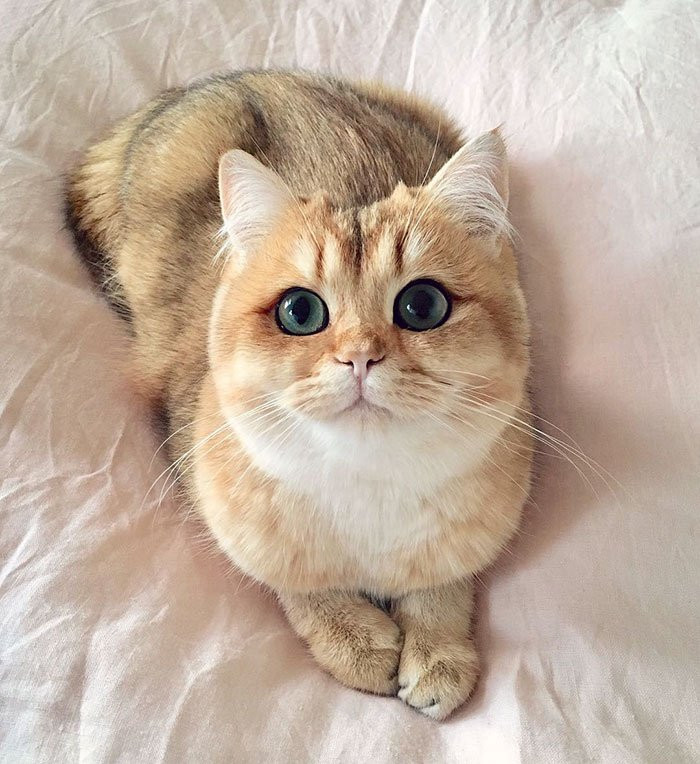